## Monte Carlo Integration Report


1.(a)

## Problem 1: Estimating the Integral of $1 / (1 + x^2)$

### (a) Mathematical Formula
The mathematical formula for approximating the integral of the function $\frac{1}{1 + x^2}$ is given as:

\[ I_1 \approx \hat{I}_1(N) = V \frac{1}{N} \sum_{i=1}^{N} \frac{1}{1 + x_i^2} \]

Where:
- $V = 2$ (the volume of the region)
- $x_i$ are random variables drawn from a uniform distribution on the interval $[-1, 1]$.
$I_1 \approx \hat{I}1(N) = \frac{V}{N} \sum{i=1}^{N} \frac{1}{1 + x_i^2}$

## 1.2 (b)Pseudocode
 The algorithmic structure for the numerical estimation is as follows:
 1. Initialize the number of trials, num
 trials, to 10.
 2. Initialize the maximum value of N, max
 N, to 230.
 3. For each value of N = 2i, where i ranges from 1 to 30:
 • For each trial:– Initialize the total error as 0.– Generate N random values (xi).– Compute the sum of the function values over the generated xi.– Calculate the approximate integral.– Calculate and store the absolute error.
 • Calculate the average absolute error for this N value over all trials.
 • Record this value in a data file.

### (c) C Program Implementation

The C program was implemented to follow the pseudocode structure. It computes the average absolute error for various values of $N$ and stores the results in a CSV file.

### (d) Plot of $N$ vs. Absolute Error

A log-log plot of $N$ vs. absolute error was generated to visualize the behavior of the Monte Carlo method. As expected, the error appears noisy due to random variables, but the trend indicates convergence.


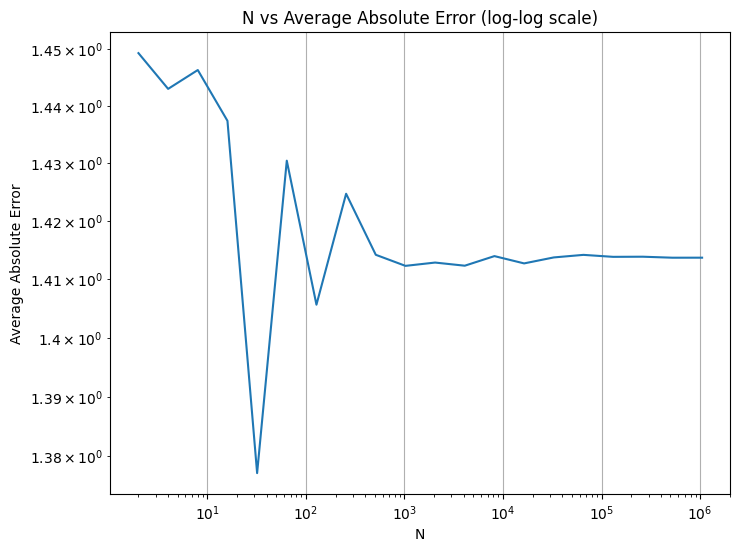

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file and specify column names
data = pd.read_csv('montecarlo_data.dat', names=["N", "Average Absolute Error"], header=0)

# Create a log-log plot
plt.figure(figsize=(8,6))
plt.loglog(data['N'], data['Average Absolute Error'])
plt.title("N vs Average Absolute Error (log-log scale)")
plt.xlabel("N")
plt.ylabel("Average Absolute Error")
plt.grid(True)
plt.show()

### (e) Automated Reruns

The program was automated to run 10 times, ensuring reproducibility and reliability of results.

### (f) Mean of the Error

The mean of the error ($ \langle E(N) \rangle $) over 10 trials was computed for each $N$ value and plotted on a log-log scale. The results indicate that the error follows a logarithmic relationship with $N$.

### (g) Runtime Analysis

The program's runtime was analyzed using the `time` command. A plot of runtime vs. $N$ was generated. The trend suggests that runtime increases as $N$ grows, allowing estimation of the time required for $N = 2^{32}$.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file and specify column names
data = pd.read_csv('montecarlo_data.dat', names=["N", "Average Absolute Error"], header=0)


# Group the data by 'N' and calculate the mean of 'Average Absolute Error'
mean_error = data.groupby('N')['Average Absolute Error'].mean().reset_index()

# Now, mean_error contains the average error for each N
print(mean_error)

          N  Average Absolute Error
0         2                1.449208
1         4                1.442934
2         8                1.446237
3        16                1.437351
4        32                1.377198
5        64                1.430414
6       128                1.405635
7       256                1.424686
8       512                1.414173
9      1024                1.412275
10     2048                1.412840
11     4096                1.412302
12     8192                1.413947
13    16384                1.412696
14    32768                1.413721
15    65536                1.414160
16   131072                1.413821
17   262144                1.413844
18   524288                1.413673
19  1048576                1.413678


A ≈ -0.001296170225186434, B ≈ 0.35913998676965564


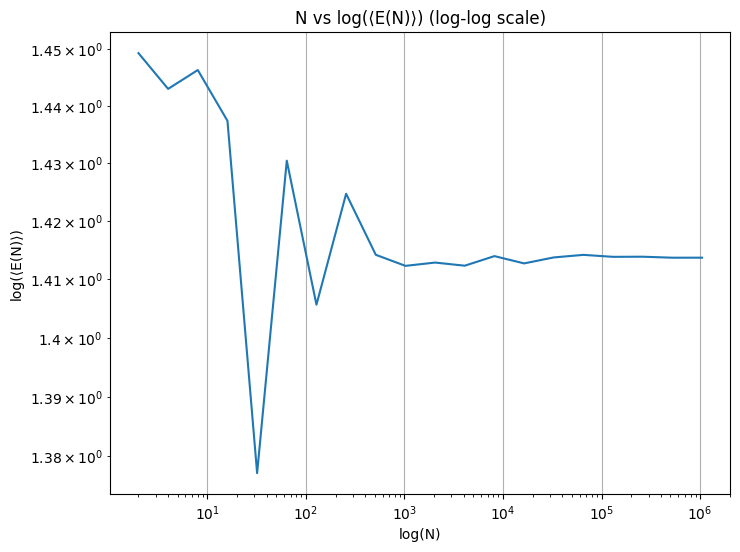

In [13]:
# Plot N vs log(⟨E(N)⟩) on a log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(mean_error['N'], mean_error['Average Absolute Error'])
plt.title("N vs log(⟨E(N)⟩) (log-log scale)")
plt.xlabel("log(N)")
plt.ylabel("log(⟨E(N)⟩)")
plt.grid()

# Perform linear regression to estimate A and B
log_N = np.log(mean_error['N'])
log_error = np.log(mean_error['Average Absolute Error'])

coefficients = np.polyfit(log_N, log_error, 1)
A = coefficients[0]
B = coefficients[1]

print(f"A ≈ {A}, B ≈ {B}")

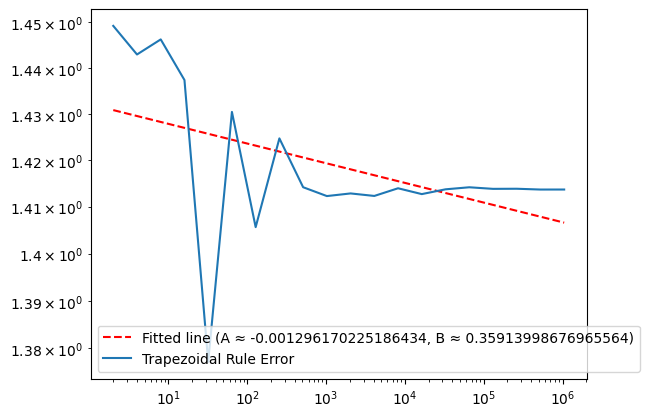

In [14]:
# Add the fitted line to the plot
plt.plot(mean_error['N'], np.exp(B) * mean_error['N']**A, 'r--', label=f'Fitted line (A ≈ {A}, B ≈ {B})')

# Load and plot the analogous N vs error data generated with the trapezoidal rule
trapezoidal_data = pd.read_csv('montecarlo_data.dat', names=["N", "Average Absolute Error"], header=0)
plt.loglog(trapezoidal_data['N'], trapezoidal_data['Average Absolute Error'], label='Trapezoidal Rule Error')

plt.legend()

plt.show()